# A finite difference scheme solving a coupled MHD system
In this notebook, we will use the finite difference scheme to solve the following scalar MHD system:
$u_t + uu_t - bb_t = \nu u_{xx},$
$b_t + ub_x - bu_x = \lambda b_{xx}.$

In the entire simulation, We will assume that $\lambda = \nu/100$. And we will use several different initial data to yield the numerical results.


In [2]:
# In this cell, we settle down the finite difference scheme. 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def func_triple(f):
    m = int(f.shape[0] - 1)
    n = int(3*m +1)
    F = np.zeros(n)
    
    for i in range(m):
        F[i] = F[i + m] = F[i+2*m] = f[i]
    
    F[n-1] = f[m]
    
    return F


def func_trisec(f):
    m = f.shape[0]
    n = int((m-1)/3)
    F = np.zeros(n+1)
    
    for i in range(n+1):
        F[i] = f[i+n]
    
    return F
        

def MHD_solver(v, lbd, T, N1, N2, _f, _g):
    f = func_triple(_f)
    g = func_triple(_g)
    
    dx = 1/N1
    dt = T/N2

    r = dt/np.power(dx,2)
    s = dt/(2*dx)
    print("The von Neumann coefficient is " + str(v*r/2))
    
    u = np.zeros((N2+1, 3*N1+1))
    b = np.zeros((N2+1, 3*N1+1))
    U = np.zeros((N2+1, N1+1))
    B = np.zeros((N2+1, N1+1))
    u[0] = f
    b[0] = g
    
    for i in range(N2):
        for j in range(3*N1 + 1):
            mr = (j+1)%(3*N1)
            ml = (j-1)%(3*N1)
        
            a1 = u[i,mr] - 2*u[i,j]+u[i, ml]
            a2 = u[i,mr] - u[i,ml]
            b1 = b[i,mr] - 2*b[i,j]+b[i, ml]
            b2 = b[i,mr] - b[i,ml]
        
            u[i+1, j] = v * r * a1 + u[i,j] * (1-s*a2) + b[i,j] * s * b2
            b[i+1, j] = lbd * r * b1 + b[i,j] * (s*a2 + 1) - u[i,j] * s * b2
            
    for i in range(N2):
        U[i] = func_trisec(u[i])
        B[i] = func_trisec(b[i])
            
    return U, B

## Test 0: periodic $u_0$ with zero magnetic field: Burgers equation

This is a null test! We just want to check whether the scheme works.

Text(0.5,1,'Initial data: b_0')

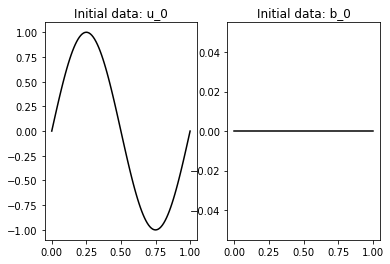

In [3]:
N1 = 100
x = np.linspace(0, 1, num=N1+1)

f0 = np.sin(2*np.pi*x)
g0 = 0*x

#check the initial data

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(x, f0, 'k-')
ax1.set_title("Initial data: u_0")

ax2.plot(x, g0, 'k')
ax2.set_title("Initial data: b_0")


The von Neumann coefficient is 0.005


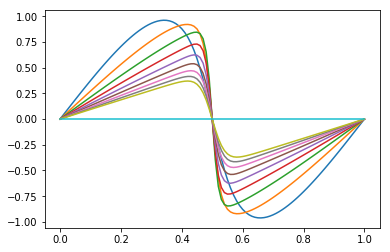

In [4]:
u0, b0 = MHD_solver(0.01, 0.01/100, 1, 100, 10000, f0, g0)

#plot the result
for i in range(1,11):
    plt.plot(x, u0[1000*i])
plt.show()

## Test 1: periodic $u_0$ and small $b_0$: the velocity field compensates the magnetic field.

The von Neumann coefficient is 0.05


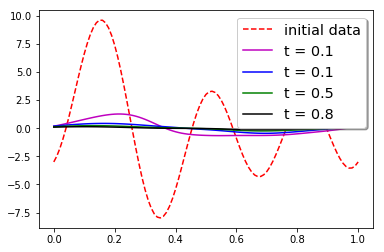

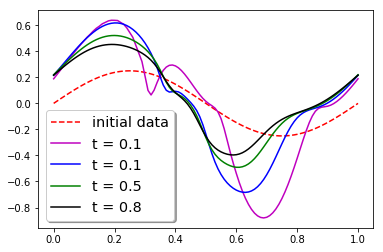

In [5]:

f1 = np.sin(2*np.pi*x) + 2*np.cos(2*np.pi*x) + 3*np.sin(4*np.pi*x) - 5*np.cos(6*np.pi*x)
g1 = 0.25*np.sin(2*np.pi*x)

u1, b1 = MHD_solver(0.1, 0.1/100, 1, 100, 10000, f1, g1)

#plot u(t,x)
fig, ax = plt.subplots()
ax.plot(x, u1[0], 'r--', label='initial data')
ax.plot(x, u1[1000], 'm-', label='t = 0.1')
ax.plot(x, u1[3000], 'b-', label='t = 0.1')
ax.plot(x, u1[5000], 'g-', label='t = 0.5')
ax.plot(x, u1[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()

#plot b(t,x)
fig, ax = plt.subplots()
ax.plot(x, b1[0], 'r--', label='initial data')
ax.plot(x, b1[1000], 'm-', label='t = 0.1')
ax.plot(x, b1[3000], 'b-', label='t = 0.1')
ax.plot(x, b1[5000], 'g-', label='t = 0.5')
ax.plot(x, b1[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')

plt.show()

## Test 2: periodic $u_0$ and large $b_0$: the velocity field is activated by the magnetic field.

The von Neumann coefficient is 0.05


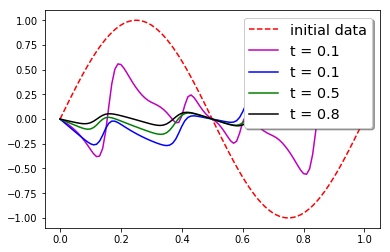

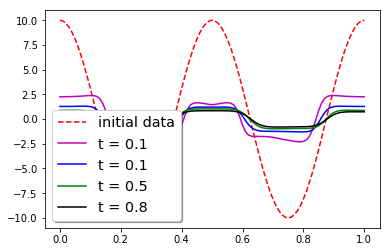

In [6]:

f2 = np.sin(2*np.pi*x)
g2 = 10*np.cos(4*np.pi*x)

u2, b2 = MHD_solver(0.1, 0.1/100, 1, 100, 10000, f2, g2)

#plot u(t,x)
fig, ax = plt.subplots()
ax.plot(x, u2[0], 'r--', label='initial data')
ax.plot(x, u2[1000], 'm-', label='t = 0.1')
ax.plot(x, u2[3000], 'b-', label='t = 0.1')
ax.plot(x, u2[5000], 'g-', label='t = 0.5')
ax.plot(x, u2[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()

#plot b(t,x)
fig, ax = plt.subplots()
ax.plot(x, b2[0], 'r--', label='initial data')
ax.plot(x, b2[1000], 'm-', label='t = 0.1')
ax.plot(x, b2[3000], 'b-', label='t = 0.1')
ax.plot(x, b2[5000], 'g-', label='t = 0.5')
ax.plot(x, b2[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')

plt.show()

## Test 3: periodic $u_0$ and perturbed $b_0$: the magnetic field perturbed by white-noise

The von Neumann coefficient is 0.05


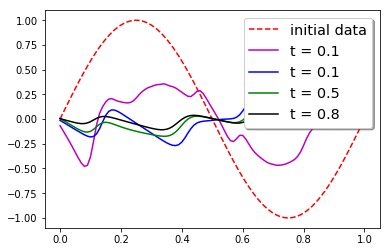

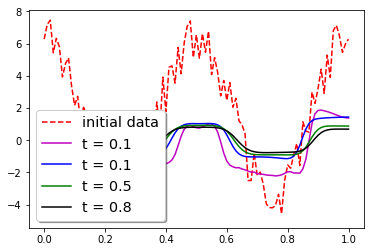

In [7]:

f3 = np.sin(2*np.pi*x)
g3 = 5*np.cos(4*np.pi*x) + 3*np.random.rand(N1+1)

u3, b3 = MHD_solver(0.1, 0.1/100, 1, 100, 10000, f3, g3)

#plot u(t,x)
fig, ax = plt.subplots()
ax.plot(x, u3[0], 'r--', label='initial data')
ax.plot(x, u3[1000], 'm-', label='t = 0.1')
ax.plot(x, u3[3000], 'b-', label='t = 0.1')
ax.plot(x, u3[5000], 'g-', label='t = 0.5')
ax.plot(x, u3[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()

#plot b(t,x)
fig, ax = plt.subplots()
ax.plot(x, b3[0], 'r--', label='initial data')
ax.plot(x, b3[1000], 'm-', label='t = 0.1')
ax.plot(x, b3[3000], 'b-', label='t = 0.1')
ax.plot(x, b3[5000], 'g-', label='t = 0.5')
ax.plot(x, b3[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')

plt.show()

## Test 4: Monotone decreasing $u_0$ with vanishing magnetic field

The von Neumann coefficient is 0.05


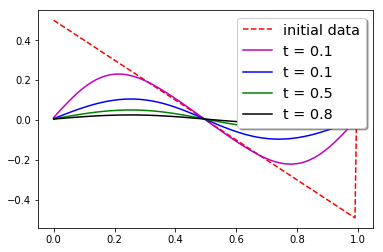

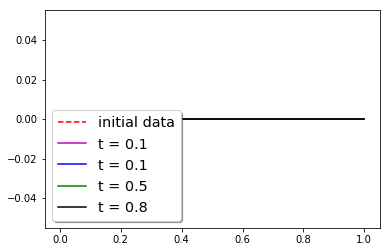

In [10]:
f4 = -x + 1/2
g4 = 0*x

u4, b4 = MHD_solver(0.1, 0.1/100, 1, 100, 10000, f4, g4)

#plot u(t,x)
fig, ax = plt.subplots()
ax.plot(x, u4[0], 'r--', label='initial data')
ax.plot(x, u4[1000], 'm-', label='t = 0.1')
ax.plot(x, u4[3000], 'b-', label='t = 0.1')
ax.plot(x, u4[5000], 'g-', label='t = 0.5')
ax.plot(x, u4[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()

#plot b(t,x)
fig, ax = plt.subplots()
ax.plot(x, b4[0], 'r--', label='initial data')
ax.plot(x, b4[1000], 'm-', label='t = 0.1')
ax.plot(x, b4[3000], 'b-', label='t = 0.1')
ax.plot(x, b4[5000], 'g-', label='t = 0.5')
ax.plot(x, b4[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')

plt.show()

## Test 5: Monotone decreasing $u_0$ with non-trivial (white-noised) magnetic field

The von Neumann coefficient is 0.05


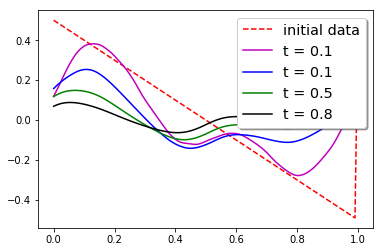

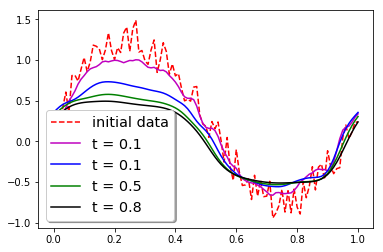

In [12]:
f5 = -x + 1/2
g5 = np.sin(2*np.pi*x) + 0.5*np.random.rand(N1+1)

u5, b5 = MHD_solver(0.1, 0.1/100, 1, 100, 10000, f5, g5)

#plot u(t,x)
fig, ax = plt.subplots()
ax.plot(x, u5[0], 'r--', label='initial data')
ax.plot(x, u5[1000], 'm-', label='t = 0.1')
ax.plot(x, u5[3000], 'b-', label='t = 0.1')
ax.plot(x, u5[5000], 'g-', label='t = 0.5')
ax.plot(x, u5[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.show()

#plot b(t,x)
fig, ax = plt.subplots()
ax.plot(x, b5[0], 'r--', label='initial data')
ax.plot(x, b5[1000], 'm-', label='t = 0.1')
ax.plot(x, b5[3000], 'b-', label='t = 0.1')
ax.plot(x, b5[5000], 'g-', label='t = 0.5')
ax.plot(x, b5[7000], 'k-', label='t = 0.8')

legend = ax.legend(loc='lower left', shadow=True, fontsize='x-large')

plt.show()